In [1]:
from Prob1 import Bidiagonalization, QR_factorization, QR_iteration
from Prob2 import blurring
import time
import numpy as np
import matplotlib.pyplot as plt

img, B, T = blurring('E:/DDA3005/proj/test_images/test_images/256_256_buildings.png')

Phase 2a 跑deblur

3.756380558013916


c:\Users\DELL\Desktop\project1&2\Prob1.py:139: RuntimeWarning: divide by zero encountered in divide
  UB = B@VB@np.diag((1/eigenvalues))


155.38166642189026


C:\Users\DELL\AppData\Local\Temp/ipykernel_18600/216525942.py:21: RuntimeWarning: divide by zero encountered in double_scalars
  s_l[i] = 1/s_l[i]
C:\Users\DELL\AppData\Local\Temp/ipykernel_18600/216525942.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  s_r[i] = 1/s_r[i]


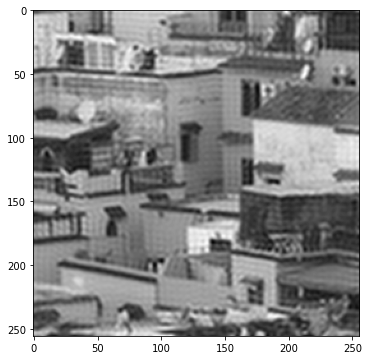

100 100 28.339913929561362 0.16451764106750488


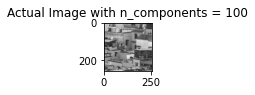

In [2]:
A_l = T.copy()
A_r = T.copy()

tic = time.time()
A_lb,U_L,V_L = Bidiagonalization(A_l)
A_rb,U_R,V_R = Bidiagonalization(A_r)
toc = time.time()
print(toc-tic)

# A_lb = gen_B(A_l,A_lb)
# A_rb = gen_B(A_r,A_rb)

tic - time.time()
u_l,s_l,v_l = QR_factorization(A_lb,U_L,V_L)
u_r,s_r,v_r = QR_factorization(A_rb,U_R,V_R)
toc = time.time()
print(toc-tic)

for i in range(len(s_l)):
#     s_l[i] = np.round(s_l[i],7)
    s_l[i] = 1/s_l[i]
for i in range(len(s_r)):
#     s_r[i] = np.round(s_r[i],7)
    s_r[i] = 1/s_r[i]


# 以下calculating inverse
def pseudoinv(u,s,v,trun):
#     v=v.T
# 这一行在不掉包是删除
    A_t = v[:, :trun] @ np.diag(s[:trun]) @ u.T[:trun, :] 
    return A_t


def frobenius(X):
    return np.sqrt(np.trace(X.T @ X))

def PSNR(n,img,X_t):
    return 10*np.log10(n**2/(frobenius(X_t-img))**2)

comps = [100]
plt.figure(figsize=(12, 6))
blurry = T @ img @ T.T


for i in range(len(comps)):
    for j in range(len(comps)):
        tic = time.time()
        A_lt = pseudoinv(u_l,s_l,v_l,comps[i])
        A_rt = pseudoinv(u_r,s_r,v_r,comps[j])
        X_t = A_lt @ blurry @ A_rt
        plt.imshow(X_t,cmap = 'gray')
        plt.show()
        toc = time.time()
        print(comps[i],comps[j],PSNR(img.shape[0],img,X_t),toc-tic)
    if(i == 0):
        plt.subplot(3, 6, i+1),
        plt.imshow(X_t, cmap='gray'),
        plt.title(f'Actual Image with n_components = {comps[i]}')

    else:
        plt.subplot(3, 6, i+1),
        plt.imshow(X_t, cmap='gray'),
        plt.title(f'n_components = {comps[i]}')

        
plt.show()

phase 2b 跑deblur


1.2127013206481934
[[ 7.00820439  0.62841938 -3.88919877 ...  0.18810537  0.08536901
  -0.20693076]
 [ 0.62841938  1.21632683  0.97206149 ... -0.07759795 -0.03515096
   0.08536901]
 [-3.88919877  0.97206149  3.82128412 ... -0.17099233 -0.07759795
   0.18810537]
 ...
 [ 0.18810537 -0.07759795 -0.17099233 ...  3.82128412  0.97206149
  -3.88919877]
 [ 0.08536901 -0.03515096 -0.07759795 ...  0.97206149  1.21632683
   0.62841938]
 [-0.20693076  0.08536901  0.18810537 ... -3.88919877  0.62841938
   7.00820439]]


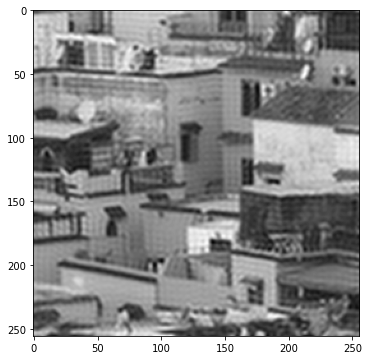

100 100 28.339913929555852 0.15354323387145996
[[ 7.00820439  0.62841938 -3.88919877 ...  0.18810537  0.08536901
  -0.20693076]
 [ 0.62841938  1.21632683  0.97206149 ... -0.07759795 -0.03515096
   0.08536901]
 [-3.88919877  0.97206149  3.82128412 ... -0.17099233 -0.07759795
   0.18810537]
 ...
 [ 0.18810537 -0.07759795 -0.17099233 ...  3.82128412  0.97206149
  -3.88919877]
 [ 0.08536901 -0.03515096 -0.07759795 ...  0.97206149  1.21632683
   0.62841938]
 [-0.20693076  0.08536901  0.18810537 ... -3.88919877  0.62841938
   7.00820439]]


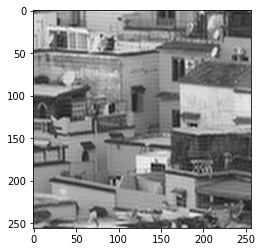

100 120 28.79278048743782 0.1409897804260254
[[ 7.00820439  0.62841938 -3.88919877 ...  0.18810537  0.08536901
  -0.20693076]
 [ 0.62841938  1.21632683  0.97206149 ... -0.07759795 -0.03515096
   0.08536901]
 [-3.88919877  0.97206149  3.82128412 ... -0.17099233 -0.07759795
   0.18810537]
 ...
 [ 0.18810537 -0.07759795 -0.17099233 ...  3.82128412  0.97206149
  -3.88919877]
 [ 0.08536901 -0.03515096 -0.07759795 ...  0.97206149  1.21632683
   0.62841938]
 [-0.20693076  0.08536901  0.18810537 ... -3.88919877  0.62841938
   7.00820439]]


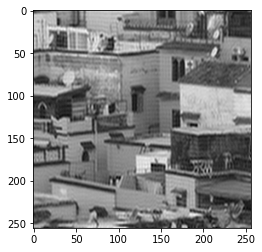

100 150 29.37806729785413 0.1292862892150879
[[ 7.00820439  0.62841938 -3.88919877 ...  0.18810537  0.08536901
  -0.20693076]
 [ 0.62841938  1.21632683  0.97206149 ... -0.07759795 -0.03515096
   0.08536901]
 [-3.88919877  0.97206149  3.82128412 ... -0.17099233 -0.07759795
   0.18810537]
 ...
 [ 0.18810537 -0.07759795 -0.17099233 ...  3.82128412  0.97206149
  -3.88919877]
 [ 0.08536901 -0.03515096 -0.07759795 ...  0.97206149  1.21632683
   0.62841938]
 [-0.20693076  0.08536901  0.18810537 ... -3.88919877  0.62841938
   7.00820439]]


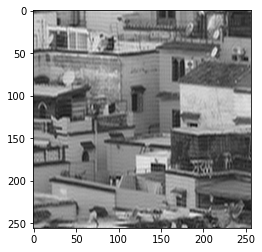

100 175 29.68780731570066 0.12351155281066895
[[ 7.00820439  0.62841938 -3.88919877 ...  0.18810537  0.08536901
  -0.20693076]
 [ 0.62841938  1.21632683  0.97206149 ... -0.07759795 -0.03515096
   0.08536901]
 [-3.88919877  0.97206149  3.82128412 ... -0.17099233 -0.07759795
   0.18810537]
 ...
 [ 0.18810537 -0.07759795 -0.17099233 ...  3.82128412  0.97206149
  -3.88919877]
 [ 0.08536901 -0.03515096 -0.07759795 ...  0.97206149  1.21632683
   0.62841938]
 [-0.20693076  0.08536901  0.18810537 ... -3.88919877  0.62841938
   7.00820439]]


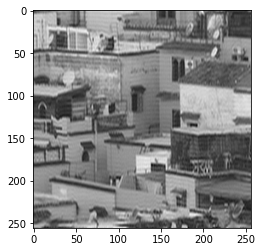

100 200 29.919758380654894 0.1322646141052246
[[ 22.44920639 -12.78433489 -15.50484578 ...   0.33063151   0.77021341
   -0.64313007]
 [-12.78433489  13.61836861  10.65500942 ...  -0.39626613  -0.92212491
    0.77021341]
 [-15.50484578  10.65500942  12.79565208 ...  -0.16965681  -0.39626613
    0.33063151]
 ...
 [  0.33063151  -0.39626613  -0.16965681 ...  12.79565208  10.65500942
  -15.50484578]
 [  0.77021341  -0.92212491  -0.39626613 ...  10.65500942  13.61836861
  -12.78433489]
 [ -0.64313007   0.77021341   0.33063151 ... -15.50484578 -12.78433489
   22.44920639]]


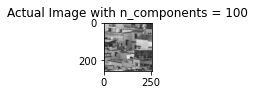

120 100 29.230327911015564 0.08021068572998047
[[ 22.44920639 -12.78433489 -15.50484578 ...   0.33063151   0.77021341
   -0.64313007]
 [-12.78433489  13.61836861  10.65500942 ...  -0.39626613  -0.92212491
    0.77021341]
 [-15.50484578  10.65500942  12.79565208 ...  -0.16965681  -0.39626613
    0.33063151]
 ...
 [  0.33063151  -0.39626613  -0.16965681 ...  12.79565208  10.65500942
  -15.50484578]
 [  0.77021341  -0.92212491  -0.39626613 ...  10.65500942  13.61836861
  -12.78433489]
 [ -0.64313007   0.77021341   0.33063151 ... -15.50484578 -12.78433489
   22.44920639]]


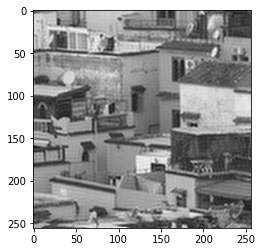

120 120 29.82488400359194 0.13567423820495605
[[ 22.44920639 -12.78433489 -15.50484578 ...   0.33063151   0.77021341
   -0.64313007]
 [-12.78433489  13.61836861  10.65500942 ...  -0.39626613  -0.92212491
    0.77021341]
 [-15.50484578  10.65500942  12.79565208 ...  -0.16965681  -0.39626613
    0.33063151]
 ...
 [  0.33063151  -0.39626613  -0.16965681 ...  12.79565208  10.65500942
  -15.50484578]
 [  0.77021341  -0.92212491  -0.39626613 ...  10.65500942  13.61836861
  -12.78433489]
 [ -0.64313007   0.77021341   0.33063151 ... -15.50484578 -12.78433489
   22.44920639]]


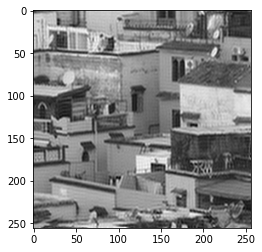

120 150 30.632492585784455 0.1439673900604248
[[ 22.44920639 -12.78433489 -15.50484578 ...   0.33063151   0.77021341
   -0.64313007]
 [-12.78433489  13.61836861  10.65500942 ...  -0.39626613  -0.92212491
    0.77021341]
 [-15.50484578  10.65500942  12.79565208 ...  -0.16965681  -0.39626613
    0.33063151]
 ...
 [  0.33063151  -0.39626613  -0.16965681 ...  12.79565208  10.65500942
  -15.50484578]
 [  0.77021341  -0.92212491  -0.39626613 ...  10.65500942  13.61836861
  -12.78433489]
 [ -0.64313007   0.77021341   0.33063151 ... -15.50484578 -12.78433489
   22.44920639]]


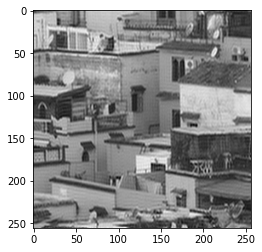

120 175 31.079536416236472 0.14072346687316895
[[ 22.44920639 -12.78433489 -15.50484578 ...   0.33063151   0.77021341
   -0.64313007]
 [-12.78433489  13.61836861  10.65500942 ...  -0.39626613  -0.92212491
    0.77021341]
 [-15.50484578  10.65500942  12.79565208 ...  -0.16965681  -0.39626613
    0.33063151]
 ...
 [  0.33063151  -0.39626613  -0.16965681 ...  12.79565208  10.65500942
  -15.50484578]
 [  0.77021341  -0.92212491  -0.39626613 ...  10.65500942  13.61836861
  -12.78433489]
 [ -0.64313007   0.77021341   0.33063151 ... -15.50484578 -12.78433489
   22.44920639]]


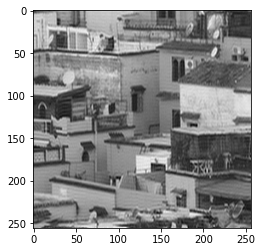

120 200 31.42845480688717 0.12482762336730957
[[ 118.25744241 -207.35730002   74.92817    ...   -6.78515501
     7.96974923   -3.12959889]
 [-207.35730002  421.76207293 -200.03735998 ...   17.27389412
   -20.29381548    7.96974924]
 [  74.92817    -200.03735998  155.13692651 ...  -14.6961746
    17.27389417   -6.78515504]
 ...
 [  -6.78515495   17.27389398  -14.69617448 ...  155.13692587
  -200.03735956   74.9281699 ]
 [   7.96974917  -20.29381532   17.27389404 ... -200.03735956
   421.76207316 -207.35730025]
 [  -3.12959887    7.96974918   -6.78515498 ...   74.9281699
  -207.35730025  118.25744257]]


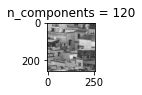

150 100 30.27523014225032 0.0635221004486084
[[ 118.25744241 -207.35730002   74.92817    ...   -6.78515501
     7.96974923   -3.12959889]
 [-207.35730002  421.76207293 -200.03735998 ...   17.27389412
   -20.29381548    7.96974924]
 [  74.92817    -200.03735998  155.13692651 ...  -14.6961746
    17.27389417   -6.78515504]
 ...
 [  -6.78515495   17.27389398  -14.69617448 ...  155.13692587
  -200.03735956   74.9281699 ]
 [   7.96974917  -20.29381532   17.27389404 ... -200.03735956
   421.76207316 -207.35730025]
 [  -3.12959887    7.96974918   -6.78515498 ...   74.9281699
  -207.35730025  118.25744257]]


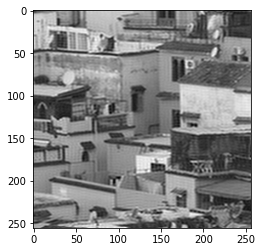

150 120 31.094418851737156 0.1389451026916504
[[ 118.25744241 -207.35730002   74.92817    ...   -6.78515501
     7.96974923   -3.12959889]
 [-207.35730002  421.76207293 -200.03735998 ...   17.27389412
   -20.29381548    7.96974924]
 [  74.92817    -200.03735998  155.13692651 ...  -14.6961746
    17.27389417   -6.78515504]
 ...
 [  -6.78515495   17.27389398  -14.69617448 ...  155.13692587
  -200.03735956   74.9281699 ]
 [   7.96974917  -20.29381532   17.27389404 ... -200.03735956
   421.76207316 -207.35730025]
 [  -3.12959887    7.96974918   -6.78515498 ...   74.9281699
  -207.35730025  118.25744257]]


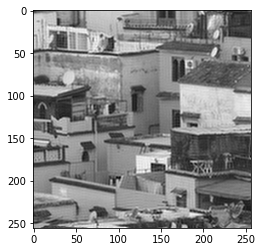

150 150 32.29796547480201 0.12991046905517578
[[ 118.25744241 -207.35730002   74.92817    ...   -6.78515501
     7.96974923   -3.12959889]
 [-207.35730002  421.76207293 -200.03735998 ...   17.27389412
   -20.29381548    7.96974924]
 [  74.92817    -200.03735998  155.13692651 ...  -14.6961746
    17.27389417   -6.78515504]
 ...
 [  -6.78515495   17.27389398  -14.69617448 ...  155.13692587
  -200.03735956   74.9281699 ]
 [   7.96974917  -20.29381532   17.27389404 ... -200.03735956
   421.76207316 -207.35730025]
 [  -3.12959887    7.96974918   -6.78515498 ...   74.9281699
  -207.35730025  118.25744257]]


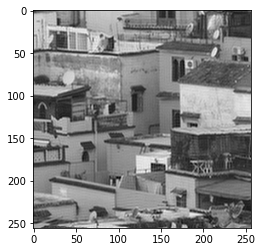

150 175 33.02966312459819 0.1272287368774414
[[ 118.25744241 -207.35730002   74.92817    ...   -6.78515501
     7.96974923   -3.12959889]
 [-207.35730002  421.76207293 -200.03735998 ...   17.27389412
   -20.29381548    7.96974924]
 [  74.92817    -200.03735998  155.13692651 ...  -14.6961746
    17.27389417   -6.78515504]
 ...
 [  -6.78515495   17.27389398  -14.69617448 ...  155.13692587
  -200.03735956   74.9281699 ]
 [   7.96974917  -20.29381532   17.27389404 ... -200.03735956
   421.76207316 -207.35730025]
 [  -3.12959887    7.96974918   -6.78515498 ...   74.9281699
  -207.35730025  118.25744257]]


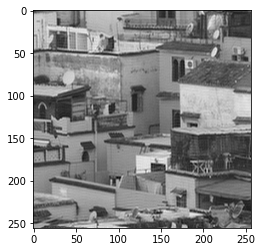

150 200 33.63516757574967 0.22701048851013184
[[  411.9881712  -1159.66260245  1416.20651973 ...    61.75102144
    -35.56687081     9.56115058]
 [-1159.66260242  3540.71046473 -4665.5496412  ...  -229.68757738
    132.30143904   -35.56687131]
 [ 1416.20651965 -4665.5496411   6715.61562211 ...   398.72284588
   -229.68758245    61.75102367]
 ...
 [   61.75101225  -229.68754324   398.72278674 ...  6715.61575271
  -4665.54977559  1416.2065674 ]
 [  -35.5668655    132.30141932  -229.6875483  ... -4665.54977547
   3540.71058495 -1159.6626433 ]
 [    9.56114915   -35.56686601    61.7510145  ...  1416.20656734
  -1159.66264328   411.9881849 ]]


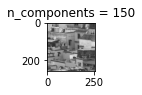

175 100 30.975899087318084 0.07428669929504395
[[  411.9881712  -1159.66260245  1416.20651973 ...    61.75102144
    -35.56687081     9.56115058]
 [-1159.66260242  3540.71046473 -4665.5496412  ...  -229.68757738
    132.30143904   -35.56687131]
 [ 1416.20651965 -4665.5496411   6715.61562211 ...   398.72284588
   -229.68758245    61.75102367]
 ...
 [   61.75101225  -229.68754324   398.72278674 ...  6715.61575271
  -4665.54977559  1416.2065674 ]
 [  -35.5668655    132.30141932  -229.6875483  ... -4665.54977547
   3540.71058495 -1159.6626433 ]
 [    9.56114915   -35.56686601    61.7510145  ...  1416.20656734
  -1159.66264328   411.9881849 ]]


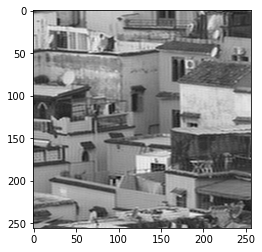

175 120 31.988994324598853 0.15977978706359863
[[  411.9881712  -1159.66260245  1416.20651973 ...    61.75102144
    -35.56687081     9.56115058]
 [-1159.66260242  3540.71046473 -4665.5496412  ...  -229.68757738
    132.30143904   -35.56687131]
 [ 1416.20651965 -4665.5496411   6715.61562211 ...   398.72284588
   -229.68758245    61.75102367]
 ...
 [   61.75101225  -229.68754324   398.72278674 ...  6715.61575271
  -4665.54977559  1416.2065674 ]
 [  -35.5668655    132.30141932  -229.6875483  ... -4665.54977547
   3540.71058495 -1159.6626433 ]
 [    9.56114915   -35.56686601    61.7510145  ...  1416.20656734
  -1159.66264328   411.9881849 ]]


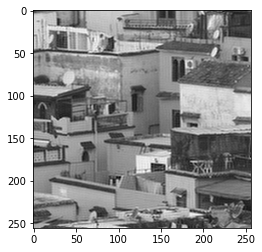

175 150 33.585868789291816 0.21486496925354004
[[  411.9881712  -1159.66260245  1416.20651973 ...    61.75102144
    -35.56687081     9.56115058]
 [-1159.66260242  3540.71046473 -4665.5496412  ...  -229.68757738
    132.30143904   -35.56687131]
 [ 1416.20651965 -4665.5496411   6715.61562211 ...   398.72284588
   -229.68758245    61.75102367]
 ...
 [   61.75101225  -229.68754324   398.72278674 ...  6715.61575271
  -4665.54977559  1416.2065674 ]
 [  -35.5668655    132.30141932  -229.6875483  ... -4665.54977547
   3540.71058495 -1159.6626433 ]
 [    9.56114915   -35.56686601    61.7510145  ...  1416.20656734
  -1159.66264328   411.9881849 ]]


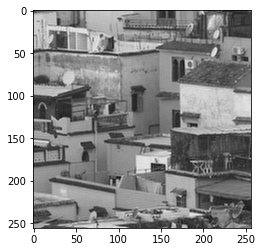

175 175 34.65695273768492 0.1293168067932129
[[  411.9881712  -1159.66260245  1416.20651973 ...    61.75102144
    -35.56687081     9.56115058]
 [-1159.66260242  3540.71046473 -4665.5496412  ...  -229.68757738
    132.30143904   -35.56687131]
 [ 1416.20651965 -4665.5496411   6715.61562211 ...   398.72284588
   -229.68758245    61.75102367]
 ...
 [   61.75101225  -229.68754324   398.72278674 ...  6715.61575271
  -4665.54977559  1416.2065674 ]
 [  -35.5668655    132.30141932  -229.6875483  ... -4665.54977547
   3540.71058495 -1159.6626433 ]
 [    9.56114915   -35.56686601    61.7510145  ...  1416.20656734
  -1159.66264328   411.9881849 ]]


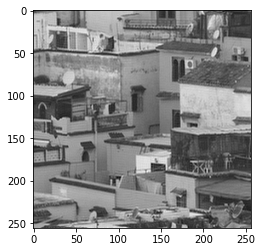

175 200 35.613068923858215 0.12810969352722168
[[ 1.17322626e+03 -4.46718792e+03  8.66190505e+03 ... -2.57402589e+02
   1.03424644e+02 -2.15562121e+01]
 [-4.46718792e+03  1.79817779e+04 -3.65072677e+04 ...  1.23494564e+03
  -4.96213394e+02  1.03424671e+02]
 [ 8.66190504e+03 -3.65072677e+04  7.75298150e+04 ... -3.07336999e+03
   1.23494605e+03 -2.57402743e+02]
 ...
 [-2.57401395e+02  1.23493991e+03 -3.07335572e+03 ...  7.75299131e+04
  -3.65073137e+04  8.66191578e+03]
 [ 1.03424164e+02 -4.96211093e+02  1.23494032e+03 ... -3.65073137e+04
   1.79817994e+04 -4.46719293e+03]
 [-2.15561119e+01  1.03424191e+02 -2.57401547e+02 ...  8.66191577e+03
  -4.46719293e+03  1.17322742e+03]]


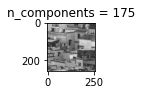

200 100 31.50394861696263 0.1129755973815918
[[ 1.17322626e+03 -4.46718792e+03  8.66190505e+03 ... -2.57402589e+02
   1.03424644e+02 -2.15562121e+01]
 [-4.46718792e+03  1.79817779e+04 -3.65072677e+04 ...  1.23494564e+03
  -4.96213394e+02  1.03424671e+02]
 [ 8.66190504e+03 -3.65072677e+04  7.75298150e+04 ... -3.07336999e+03
   1.23494605e+03 -2.57402743e+02]
 ...
 [-2.57401395e+02  1.23493991e+03 -3.07335572e+03 ...  7.75299131e+04
  -3.65073137e+04  8.66191578e+03]
 [ 1.03424164e+02 -4.96211093e+02  1.23494032e+03 ... -3.65073137e+04
   1.79817994e+04 -4.46719293e+03]
 [-2.15561119e+01  1.03424191e+02 -2.57401547e+02 ...  8.66191577e+03
  -4.46719293e+03  1.17322742e+03]]


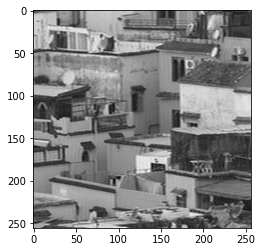

200 120 32.69631020980516 0.1603388786315918
[[ 1.17322626e+03 -4.46718792e+03  8.66190505e+03 ... -2.57402589e+02
   1.03424644e+02 -2.15562121e+01]
 [-4.46718792e+03  1.79817779e+04 -3.65072677e+04 ...  1.23494564e+03
  -4.96213394e+02  1.03424671e+02]
 [ 8.66190504e+03 -3.65072677e+04  7.75298150e+04 ... -3.07336999e+03
   1.23494605e+03 -2.57402743e+02]
 ...
 [-2.57401395e+02  1.23493991e+03 -3.07335572e+03 ...  7.75299131e+04
  -3.65073137e+04  8.66191578e+03]
 [ 1.03424164e+02 -4.96211093e+02  1.23494032e+03 ... -3.65073137e+04
   1.79817994e+04 -4.46719293e+03]
 [-2.15561119e+01  1.03424191e+02 -2.57401547e+02 ...  8.66191577e+03
  -4.46719293e+03  1.17322742e+03]]


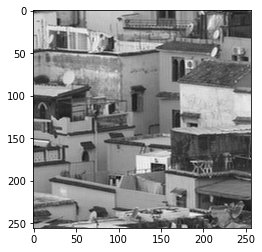

200 150 34.71352252764475 0.13974428176879883
[[ 1.17322626e+03 -4.46718792e+03  8.66190505e+03 ... -2.57402589e+02
   1.03424644e+02 -2.15562121e+01]
 [-4.46718792e+03  1.79817779e+04 -3.65072677e+04 ...  1.23494564e+03
  -4.96213394e+02  1.03424671e+02]
 [ 8.66190504e+03 -3.65072677e+04  7.75298150e+04 ... -3.07336999e+03
   1.23494605e+03 -2.57402743e+02]
 ...
 [-2.57401395e+02  1.23493991e+03 -3.07335572e+03 ...  7.75299131e+04
  -3.65073137e+04  8.66191578e+03]
 [ 1.03424164e+02 -4.96211093e+02  1.23494032e+03 ... -3.65073137e+04
   1.79817994e+04 -4.46719293e+03]
 [-2.15561119e+01  1.03424191e+02 -2.57401547e+02 ...  8.66191577e+03
  -4.46719293e+03  1.17322742e+03]]


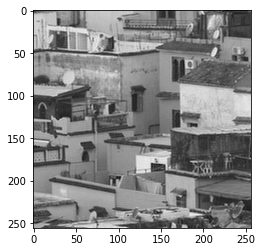

200 175 36.2142244445276 0.18996548652648926
[[ 1.17322626e+03 -4.46718792e+03  8.66190505e+03 ... -2.57402589e+02
   1.03424644e+02 -2.15562121e+01]
 [-4.46718792e+03  1.79817779e+04 -3.65072677e+04 ...  1.23494564e+03
  -4.96213394e+02  1.03424671e+02]
 [ 8.66190504e+03 -3.65072677e+04  7.75298150e+04 ... -3.07336999e+03
   1.23494605e+03 -2.57402743e+02]
 ...
 [-2.57401395e+02  1.23493991e+03 -3.07335572e+03 ...  7.75299131e+04
  -3.65073137e+04  8.66191578e+03]
 [ 1.03424164e+02 -4.96211093e+02  1.23494032e+03 ... -3.65073137e+04
   1.79817994e+04 -4.46719293e+03]
 [-2.15561119e+01  1.03424191e+02 -2.57401547e+02 ...  8.66191577e+03
  -4.46719293e+03  1.17322742e+03]]


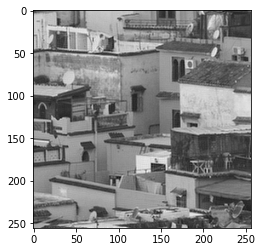

200 200 37.71139293590127 0.24903011322021484


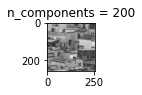

In [3]:
A_l = T.copy()
A_r = T.copy()

tic = time.time()
A_lb,U_L,V_L = Bidiagonalization(A_l)
A_rb,U_R,V_R = Bidiagonalization(A_r)
toc = time.time()
print(toc-tic)


u_l,s_l,v_l = QR_iteration(A_lb,U_L,V_L)
u_r,s_r,v_r = QR_iteration(A_rb,U_R,V_R)


for i in range(len(s_l)):
    s_l[i] = 1/s_l[i]
for i in range(len(s_r)):
    s_r[i] = 1/s_r[i]


# 以下calculating inverse
def pseudoinv(u,s,v,trun):
#     v=v.T
# 这一行在不掉包是删除
    A_t = v[:, :trun] @ np.diag(s[:trun]) @ u.T[:trun, :] 
    return A_t


def frobenius(X):
    return np.sqrt(np.trace(X.T @ X))

def PSNR(n,img,X_t):
    return 10*np.log10(n**2/(frobenius(X_t-img))**2)

comps = [100,120,150,175,200]
plt.figure(figsize=(12, 6))
blurry = T @ img @ T.T


for i in range(len(comps)):
    for j in range(len(comps)):
        tic = time.time()
        A_lt = pseudoinv(u_l,s_l,v_l,comps[i])
        print(A_lt)
        A_rt = pseudoinv(u_r,s_r,v_r,comps[j])
        X_t = A_lt @ blurry @ A_rt
        plt.imshow(X_t,cmap = 'gray')
        plt.show()
        toc = time.time()
        print(comps[i],comps[j],PSNR(img.shape[0],img,X_t),toc-tic)
    if(i == 0):
        plt.subplot(3, 6, i+1),
        plt.imshow(X_t, cmap='gray'),
        plt.title(f'Actual Image with n_components = {comps[i]}')

    else:
        plt.subplot(3, 6, i+1),
        plt.imshow(X_t, cmap='gray'),
        plt.title(f'n_components = {comps[i]}')

        
plt.show()

另一种problem2-2的算法

5.527454137802124


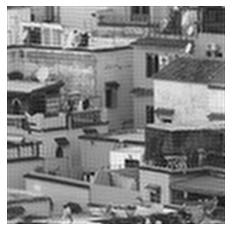

In [4]:
img, B, T = blurring('E:/DDA3005/proj/test_images/test_images/256_256_buildings.png')

A_l = T.copy()
A_r = T.copy()

tic = time.time()
A_lb,U_L,V_L = Bidiagonalization(A_l)
A_rb,U_R,V_R = Bidiagonalization(A_r)
toc = time.time()
# print(toc-tic)


u_l,s_l,v_l = QR_iteration(A_lb,U_L,V_L)
u_r,s_r,v_r = QR_iteration(A_rb,U_R,V_R)

s_l = np.array(s_l)

trun = 100
newU_l = u_l[:, :trun]
newS_l = s_l[:trun]
newV_l = v_l[:, :trun]
A_l = (newV_l.T/newS_l[:, None]).T@newU_l.T

newU_r = u_r[:, :trun]
newS_r = s_r[:trun]
newV_r = v_r[:, :trun]
A_r = (newV_r.T/newS_r[:, None]).T@newU_r.T

# A_t = v_l[:, :trun] @ np.diag(s_l[:trun]) @ u_l.T[:trun, :] 
blurry = T @ img @ T.T
X_t = A_l @ blurry @ A_r
toc = time.time()

print(toc-tic)
plt.axis('off')
plt.imshow(X_t,cmap = 'gray')
plt.show()